<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/Imbal_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Random Oversampling

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
X, y = make_classification(n_samples= 10000, weights= [.99], flip_y= 0)

In [4]:
print(Counter(y))

Counter({0: 9900, 1: 100})


In [5]:
os = RandomOverSampler(sampling_strategy= 'minority')

In [6]:
X_o, y_o = os.fit_resample(X, y)

In [7]:
print(Counter(y_o))

Counter({0: 9900, 1: 9900})


In [8]:
#define step

In [9]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeL = Pipeline(steps= steps)

In [10]:
## Eval mod

In [11]:
cv1 = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipeL, X, y, scoring= 'f1_micro', cv = cv1, n_jobs= -1)
sc1 = np.mean(score1)

In [12]:
print(sc1)

0.9874999999999999


# UnderSample

In [13]:
## Random Undersample

In [14]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [15]:
X, y = make_classification(n_samples= 10000, weights= [0.99], flip_y= 0)

In [16]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [17]:
us1 = RandomUnderSampler(sampling_strategy = 'majority') #the sampling_strategy can also be set to 0.5 for 200 majority sample

In [18]:
X_o, y_o = us1.fit_resample(X, y)

In [19]:
print(Counter(y_o))

Counter({0: 100, 1: 100})


In [20]:
#def step

In [21]:
step1 = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipe1 = Pipeline(steps= step1)

In [22]:
#def model and cross-val-score

In [23]:
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipe1, X, y, scoring = 'f1_micro', cv = cv, n_jobs= -1)

In [24]:
score1 = np.mean(score1)
print(score1)

0.875


# **OVERSAMPLE**

In [25]:
# How To Create A SMOTE Dataset Using Python
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [26]:
## Create data
X, y = make_classification(n_samples = 100, n_features = 2, n_informative= 2, n_redundant= 0, n_clusters_per_class= 1, weights= [0.9], random_state= 10)

In [27]:
##counter
counter = Counter(y)
print(counter)

Counter({0: 91, 1: 9})


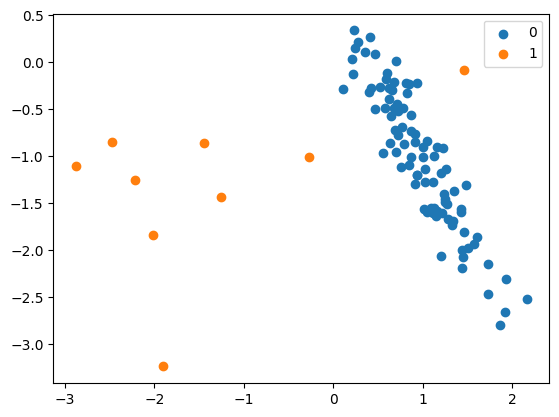

In [28]:
#viz imbal data
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [29]:
##SMOTE
os1 = SMOTE()
X, y = os1.fit_resample(X, y)

In [30]:
#count
counter1 = Counter(y)
print(counter1)

Counter({0: 91, 1: 91})


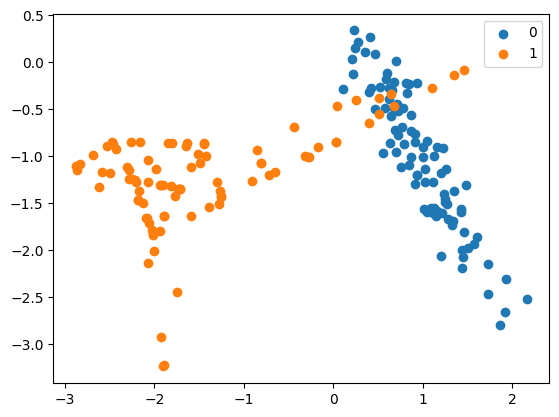

In [31]:
#viz
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# SMOTE For Class

In [32]:
##classification

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [34]:
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [35]:
mod1 = DecisionTreeClassifier()

In [36]:
cv1 = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 1)
sc1 = cross_val_score(mod1, X, y, scoring = 'roc_auc', n_jobs= -1)

In [37]:
print(np.mean(sc1))

0.7726767676767677


In [38]:
# Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset.
#The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only,
#then evaluate the model on the stratified but non-transformed test set. This can be achieved by defining a Pipeline that
#first transforms the training dataset with SMOTE

In [39]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [40]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [41]:
# Pipeline
step = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipe = Pipeline(steps= step)

In [42]:
cv1 = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
sc1 = cross_val_score(pipe, X, y, scoring = 'roc_auc', n_jobs= -1)

In [43]:
print(np.mean(sc1))

0.8137878787878788


In [44]:
from imblearn.over_sampling import BorderlineSMOTE

In [45]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

In [46]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [47]:
os1 = BorderlineSMOTE()
X, y = os1.fit_resample(X, y)

In [48]:
counter1 = Counter(y)
print(counter1)

Counter({0: 9900, 1: 9900})


In [49]:
#viz

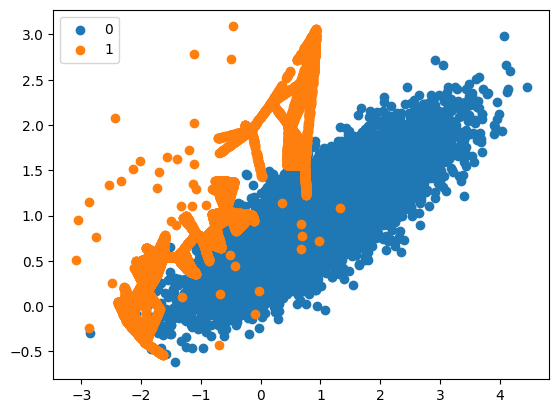

In [50]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [51]:
from imblearn.over_sampling import SVMSMOTE

In [52]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 9900})


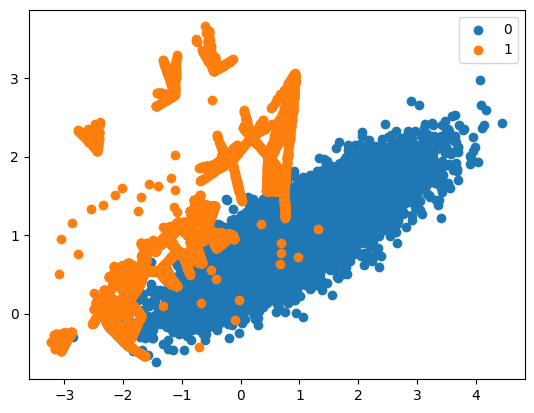

In [53]:
os1 = SVMSMOTE()
X, y = os1.fit_resample(X, y)
counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [54]:
#ADASYN
from imblearn.over_sampling import ADASYN

In [55]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 9900, 1: 9899})


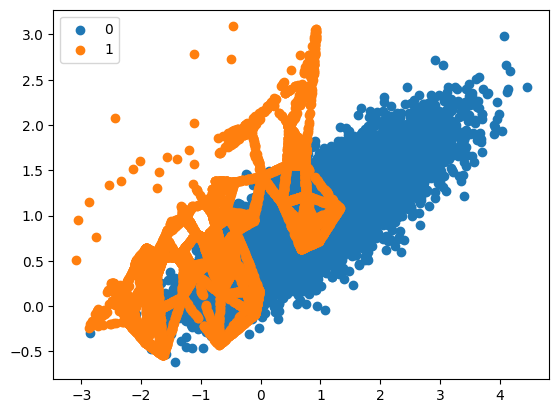

In [56]:
os1 = ADASYN()
X, y = os1.fit_resample(X, y)
counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# UnderSampling

In [57]:
from imblearn.under_sampling import NearMiss

In [58]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [59]:
#mod1

Counter({0: 100, 1: 100})


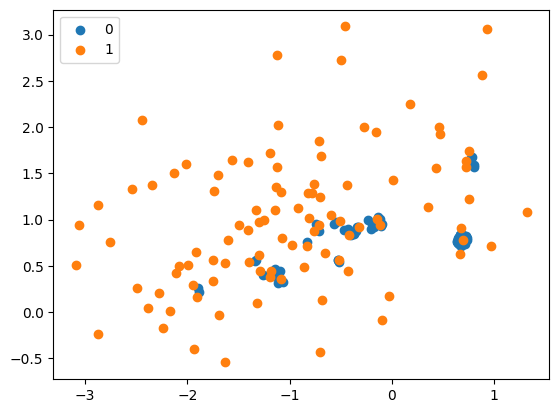

In [60]:
us1 = NearMiss(version= 1, n_neighbors= 3)
X, y = us1.fit_resample(X, y)

counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [61]:
# CNN
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier

In [62]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


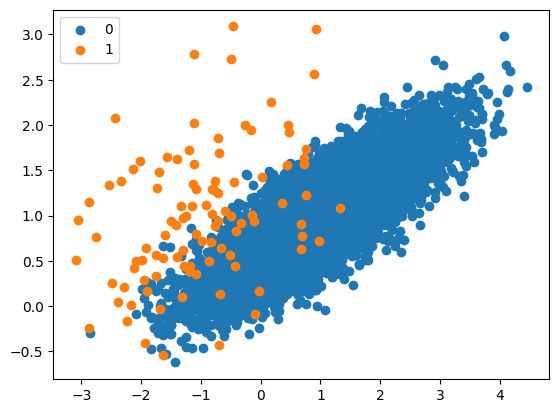

In [63]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

Counter({0: 120, 1: 100})


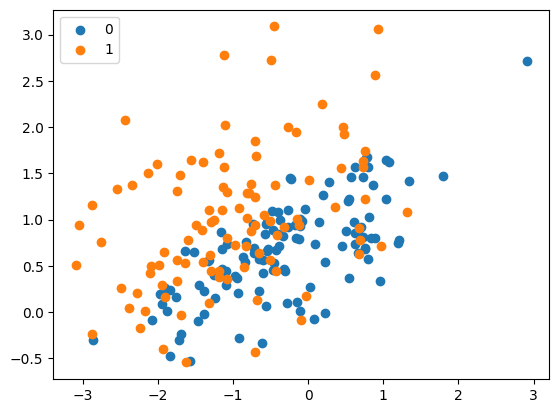

In [64]:
us1 = CondensedNearestNeighbour(n_neighbors= 3, random_state = 42)
X, y = us1.fit_resample(X, y)

counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [65]:
#Tomek
from imblearn.under_sampling import TomekLinks

In [66]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


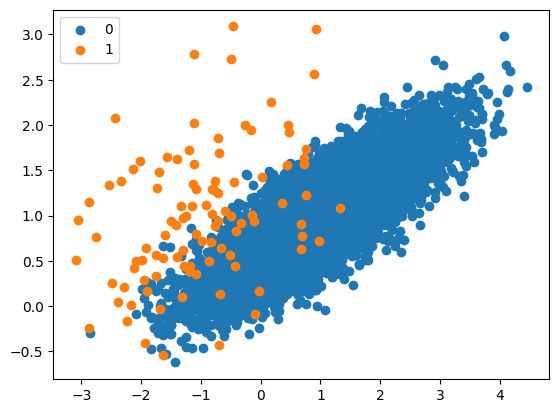

In [67]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [68]:
us2 = TomekLinks()
X, y = us2.fit_resample(X, y)

Counter({0: 9874, 1: 100})


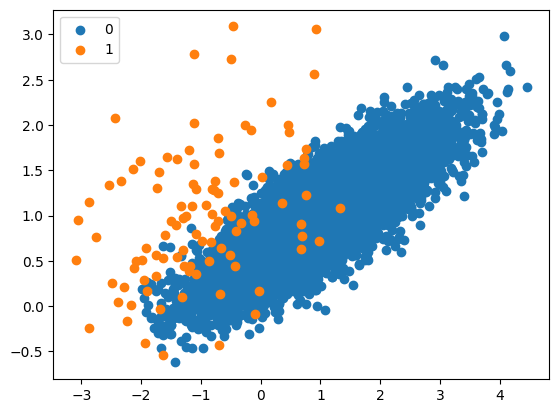

In [69]:
counter1 = Counter(y)
print(counter1)

for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [70]:
#One-Side

In [71]:
from imblearn.under_sampling import OneSidedSelection

In [72]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [73]:
oss1 = OneSidedSelection(n_neighbors= 1, n_seeds_S= 200, random_state = 42)
X, y = oss1.fit_resample(X,y)

In [74]:
counter1 = Counter(y)
print(counter1)

Counter({0: 1174, 1: 100})


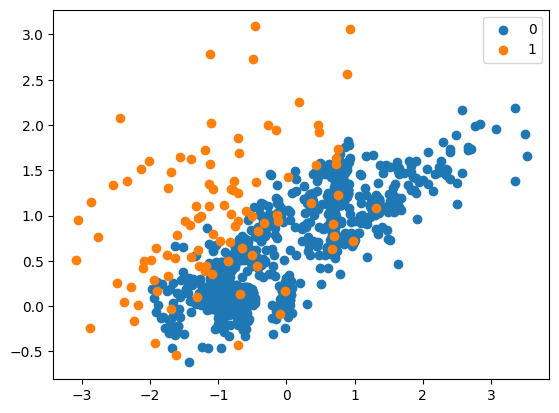

In [75]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [76]:
#NeighborhoodCleaning

In [77]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [78]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [79]:
us1 = NeighbourhoodCleaningRule()
X, y = us1.fit_resample(X, y)

counter1 = Counter(y)
print(counter1)

Counter({0: 9786, 1: 100})


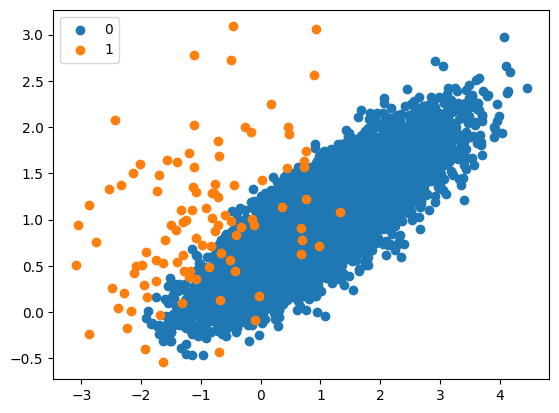

In [80]:
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# Combining Oversamp And Undersam Manually

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [82]:
#dataset

In [83]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [84]:
#mod
mod1 = DecisionTreeClassifier()

In [85]:
os1 = RandomOverSampler(sampling_strategy= 0.1)
us1 = RandomUnderSampler(sampling_strategy= 0.5)

In [86]:
pipe1 = Pipeline(steps= [('over', os1), ('under', us1), ('model', mod1)])

In [87]:
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 1)

In [88]:
score = cross_val_score(pipe1, X, y, scoring= 'roc_auc', n_jobs= -1, cv = cv1)

In [89]:
print(np.mean(score))

0.8287037037037035


In [90]:
# Use SMOTE Oversampl

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [93]:
#mod
mod1 = DecisionTreeClassifier()

#os and us
os1 = SMOTE(sampling_strategy= 0.1)
us1 = RandomUnderSampler(sampling_strategy= 0.5)

pipe1 = Pipeline(steps= [('over', os1), ('under', us1), ('model', mod1)])

In [94]:
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 1)
score = cross_val_score(pipe1, X, y, scoring = 'roc_auc', cv = cv1, n_jobs = -1)

In [95]:
print(np.mean(score))

0.8319023569023568


In [96]:
#Autocombine os and us

In [97]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [98]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [99]:
#mod
mod1 = DecisionTreeClassifier()

#combine
combine1 = SMOTETomek(tomek = TomekLinks(sampling_strategy= 'majority'))

pipe1 = Pipeline(steps= [('r', combine1), ('m', mod1)])

In [100]:
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
score1 = cross_val_score(pipe1, X, y, scoring = 'roc_auc', cv = cv1, n_jobs = -1)

In [101]:
print(np.mean(score1))

0.8183670033670033


In [102]:
#combine SMOTE and ENN

In [103]:
from imblearn.combine import SMOTEENN

In [104]:
#dataset
X, y = make_classification(n_samples = 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [105]:
#mod
mod1 = DecisionTreeClassifier()

#combine
combine1 = SMOTEENN()

pipe1 = Pipeline(steps= [('r', combine1), ('m', mod1)])

In [106]:
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
score1 = cross_val_score(pipe1, X, y, scoring = 'roc_auc', cv = cv1, n_jobs = -1)

In [107]:
print(np.mean(score1))

0.8517508417508417


# IMB CLASS Data

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

In [109]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

Counter({0: 990, 1: 10})


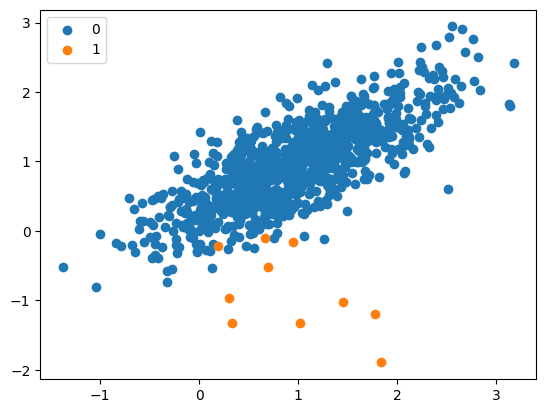

In [110]:
## vizual
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()

In [111]:
## Next we add Logistic Regression and try to get a mean ROC AUC for the same
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [112]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

mod1 = LogisticRegression(solver= 'lbfgs')

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 990, 1: 10})
0.9964141414141412


In [113]:
## Using the CLASS WEIGHT option from scikit learn

In [114]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

weights = {0 : 0.01, 1 : 1.0}

mod1 = LogisticRegression(solver= 'lbfgs', class_weight = weights)

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 990, 1: 10})
0.9928787878787879


In [115]:
## calculating the weights using scikitlearn

In [116]:
from sklearn.utils.class_weight import compute_class_weight

weight1 = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y)

print(weight1)

[ 0.50505051 50.        ]


In [118]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

mod1 = LogisticRegression(solver= 'lbfgs', class_weight = 'balanced')

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 990, 1: 10})
0.9965824915824916


**Cost Sensitivity Decision Trees**

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [121]:
## dataset
X, y = make_classification(n_samples= 10000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

mod1 = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 9900, 1: 100})
0.7569203802733215


In [123]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

weights = {0 : 0.01, 1 : 1.0}

mod1 = DecisionTreeClassifier(class_weight = weights)

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 990, 1: 10})
0.780429292929293


In [127]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

mod1 = DecisionTreeClassifier( class_weight = 'balanced')

cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 3, random_state = 2)

score1 = cross_val_score(mod1, X, y, scoring= 'roc_auc', cv = cv, n_jobs = -1)

print(np.mean(score1))

Counter({0: 990, 1: 10})
0.7762121212121212


In [131]:
## dataset
X, y = make_classification(n_samples= 1000, n_features= 2, n_redundant= 0, n_clusters_per_class= 1, weights = [0.99], flip_y = 0, random_state = 1)

counter = Counter(y)
print(counter)

bal1 = [{0:100, 1:1}, {0:10, 1:1}, {0:1, 1:1}, {0:1, 1:10}, {0:1, 1:100}]

param_grid = dict(class_weight = bal1)

mod1 = DecisionTreeClassifier()

cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 2)

grid = GridSearchCV(estimator = mod1, param_grid = param_grid, scoring = 'roc_auc', cv = cv1, n_jobs = -1)

grid_res = grid.fit(X, y)

print(grid_res.best_score_, grid_res.best_params_)

means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']
params = grid_res.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print(mean, std, param)

Counter({0: 990, 1: 10})
0.8986531986531986 {'class_weight': {0: 1, 1: 1}}
0.8481481481481481 0.22867481219681182 {'class_weight': {0: 100, 1: 1}}
0.8481481481481481 0.22867481219681182 {'class_weight': {0: 10, 1: 1}}
0.8986531986531986 0.19976405722471 {'class_weight': {0: 1, 1: 1}}
0.8313131313131312 0.23536870805559956 {'class_weight': {0: 1, 1: 10}}
0.8311447811447811 0.23561091738919013 {'class_weight': {0: 1, 1: 100}}
